# this is my notebook

In [ ]:
import json
import numpy as np
import sys
from parseFile import parseFile
import matplotlib.pyplot as plt
import sklearn
import scipy
print("Importing Done")

Error: Session cannot generate requests

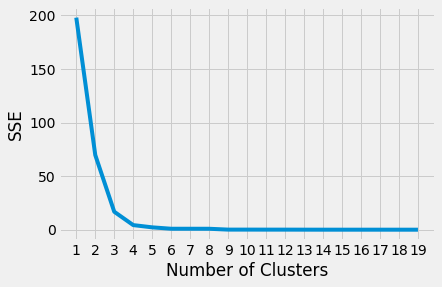

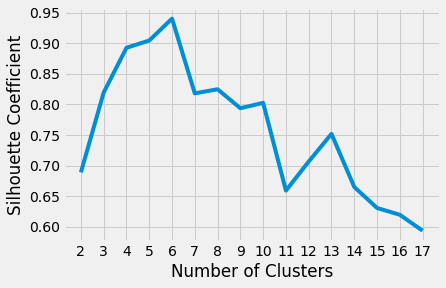

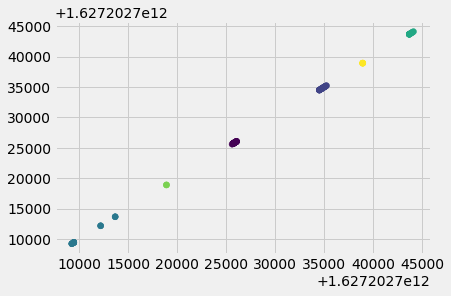

[2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3]


In [21]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import csv
from parseFile import parseFile
import sys

# file = parseFile(sys.argv)
# if None == file:
#     print("EXIT")
#     exit()

# with open(,'r') as dest_f:
#     data_iter = csv.DictReader(dest_f,
#                            delimiter = ',',
#                            quotechar = '"')
#     data = [data for data in data_iter]
# data_array = np.asarray(data, dtype = None)
# print(data_array[0,0:])

data = pd.read_csv('huri10645_1627202709231.csv')
# print(data.head())
X = data.drop(['index','name'],axis=1)
XX = data.drop('y',axis=1)
XY = data.drop('x',axis=1)
# print(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42,
}

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()




sil = []
for k in range(2,18):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 18), sil)
plt.xticks(range(2, 18))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()




res = KMeans(n_clusters=6, random_state=89).fit_predict(X)

plt.scatter(data['x'], data['y'], c=res)
plt.autoscale(enable=True, axis='y')
plt.show()
print(res)

In [7]:
file = open('dataHW.json','r')
data = json.load(file)

In [8]:
# X = []
# Y = []

# Xname = []
# Yname = []

# sIndex = 0
# for sessions in data:
    
#     sIndex += 1
    
#     operations = sessions['sessionOps']
#     operations.sort(key=lambda s: s['timestamp'], reverse=False)

#     offset = operations[0]['timestamp']-100
#     # print(offset)

#     for op in operations:
    
#         X.append(sIndex)
#         Y.append(abs(op['timestamp'])-offset)
#         print(abs(op['timestamp'])-offset)
    

In [9]:
plt.scatter(X,Y,s = 0.1)
plt.axis([0,6,10,35000])
plt.show()

NameError: name 'X' is not defined

In [10]:
import math
count = 1
print(data)

for sess in data:
    totalCalls = 0
    totalTime = 0
    smallest = None
    biggest = 0
    times = {}
    mean = 0
    print('\n\n\n\n-----------------------------------------------------------------------')
    operations = sess['sessionOps']
    operations.sort(key=lambda s: s['timestamp'], reverse=False)
    prev = None
    for op in operations:
        if prev == None:
            prev = op
        else:
            totalCalls += 1
            diff = op['timestamp'] - prev['timestamp']
            # print(diff)
            if smallest == None:
                smallest = diff
            elif smallest > diff:
                smallest = diff
            
            if biggest < diff:
                biggest = diff

            times[totalCalls] = diff
            totalTime += diff
            prev = op
            
    print("totalcalls = "+str(totalCalls))
    print("totalTime  = "+str(totalTime))
    print("smallest   = "+str(smallest))
    print("biggest    = "+str(biggest))
    mean = totalTime/totalCalls
    print("mean       = "+str(round(mean)))
    print("times  "+str(times))


    prev = None
    variance = []
    squaredtotal = 0
    for op in operations:
        if prev == None:
            prev = op
        else:
            diff = op['timestamp'] - prev['timestamp']
            # print(diff)
            variance.append(abs(diff - mean))
            v = abs(diff - mean)# * abs(diff - mean)
            squaredtotal += v * v
            prev = op
    print("variance = "+str(round(squaredtotal/(totalCalls-0))))
    stdDev = round(math.sqrt(squaredtotal/(totalCalls-0)))
    print("std dev = "+ str(stdDev))
    print(variance)

    prev = None
    groups = 0
    prevIS = False
    for op in operations:
        if prev == None:
            prev = op
        else:
            diff = op['timestamp'] - prev['timestamp']
            # if diff > mean:
            #     # if diff > mean+stdDev:
            #     #     groups += 1
            #     pass
            if diff <= 1000:
                if prevIS == False:
                    prevIS = True
                # print(diff)
            else:
                prevIS = False
                groups += 1
                print("new group")
            prev = op
    print("groups = "+str(groups+1))
    # break


[{'_id': 'todoapp1693_1626524424986', 'webapp': '60f2bd7437deceb0424afa3b', 'user_session_id': '1693_1626524424986', 'app_versoin': '1.0', 'sessionOps': [{'_id': '60f2cb095b754324cd52c980', 'session_id': 'todoapp1693_1626524424986', 'timestamp': 1626524425060.0, 'operation': {'msg': 'method', 'id': '1', 'method': 'login', 'params': [{'resume': 'wlENubYn5zlMz-Nz0VuJChQPgyHZ8J1Z24Rj1eTcskC'}]}}, {'_id': '60f2cb095b754324cd52c981', 'session_id': 'todoapp1693_1626524424986', 'timestamp': 1626524425061.0, 'operation': {'msg': 'sub', 'id': '29jHWLFse37j5N2b2', 'name': 'meteor.loginServiceConfiguration', 'params': []}}, {'_id': '60f2cb095b754324cd52c982', 'session_id': 'todoapp1693_1626524424986', 'timestamp': 1626524425062.0, 'operation': {'msg': 'sub', 'id': 'QyyzPrckJYrtoYbTQ', 'name': 'meteor_autoupdate_clientVersions', 'params': []}}, {'_id': '60f2cb095b754324cd52c983', 'session_id': 'todoapp1693_1626524424986', 'timestamp': 1626524425093.0, 'operation': {'msg': 'sub', 'id': 'FSJ5D7Wujeg

*






In [ ]:
def getName(operation,prevNames,sIndex):
    
    if operation['msg'] == 'sub':
        name = "sub "+operation['name']
    elif operation['msg'] == 'unsub':
        name = "unsub "
    else:
        name = "method "+operation['method']

    if (str(sIndex)+"_"+name+" 1") in prevNames:
        index = 1
        while True:
            index += 1
            if str(sIndex)+"_"+name+" "+str(index) not in prevNames:
                return str(sIndex)+"_"+name+" "+str(index)
    else:
        return str(sIndex)+"_"+name+" 1"

sIndex = 0
sessionResults = []
for sessions in data:
    prevNames = []
    X = []
    Y = []
    
    sIndex = sIndex + 1
    
    operations = sessions['sessionOps']
    operations.sort(key=lambda s: s['timestamp'], reverse=False)

    offset = operations[0]['timestamp']-100
    # print(offset)

    for op in operations:
        name = getName(op['operation'],prevNames,sIndex)
        prevNames.append(name)
        for otherOp in operations:
           
            diff = abs(op['timestamp']-otherOp['timestamp'])
            # if diff >= 200:
            #     diff = 200
            X.append(diff)
            Y.append(name)
    sessionResults.append([X,Y])
    break

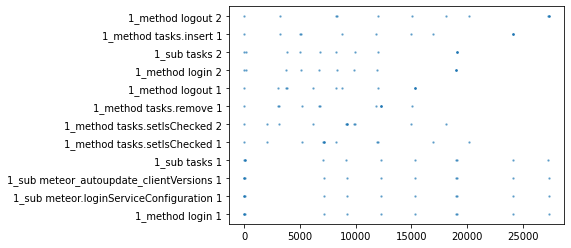

In [ ]:
for i in sessionResults:
    colors = np.random.rand(len(i[1]))
    plt.scatter(i[0],i[1],s=2,alpha=0.5)
    # plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.autoscale(enable=True, axis='y')
    plt.show()
